In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### LLN ensures convergence
<img src="figs/law_of_large_number_1.png" alt="Drawing" style="height: 250px;"/>

#### Example
<img src="figs/law_of_large_number_2.png" alt="Drawing" style="height: 100px;"/>

#### Analytical result: 1.75

In [2]:
df = pd.DataFrame({"n" : np.linspace(100, 50000, 100).astype(int)}).set_index("n")

for n in df.index:
    df_tmp = pd.DataFrame({"u" : np.random.rand(n)})
    df_tmp["0.5"] = (df_tmp.u <= 0.5)
    df_tmp["1"] = ((df_tmp.u > 0.5) & (df_tmp.u <= 3 / 4))
    df_tmp["5"] = (df_tmp.u > 3 / 4)
    e = 0
    for val in [0.5, 1, 5]:
        e += sum(df_tmp[str(val)].astype(int) * val)
    df.ix[n, "EX"] = e / n

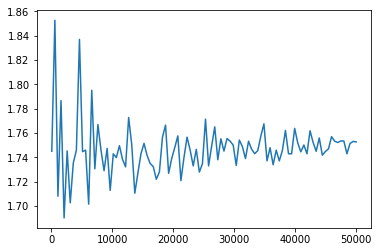

In [3]:
plt.plot(df.index, df.EX)

#### Speed up
* Sort probability from high to low.
* More likely events get found first (saving for loop time).

In [4]:
p = [[0.5, 0.5],
     [0.25, 1],
     [0.25, 5]]
p = sorted(p, key = lambda x : -x[0])
c = np.cumsum([v[0] for v in p])
m = {c[i] : p[i][1] for i in range(len(c))}

x = []
n = 100000
for _ in range(n):
    u = np.random.rand()
    for t in c:
        if u < t:
            x.append(m[t])
            break
print("E[X] = %.3f"%(sum(x)/n))

E[X] = 1.750
